In [187]:
# PYTHON ---  PROJECT 2  ----  ANZHELA  CHANYSHEVA

# STEP 1. Import necessary libraries and also set some display options.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [188]:
# STEP 2. Load the DIABETIC dataset.
# df.head() display the first rows of the dataset for understanding what columns
# exist, what type of information it contains, and whether the data loaded correctly.

df=pd.read_csv('https://raw.githubusercontent.com/anzhelachanysheva/projects/refs/heads/main/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# I can also load a CSV file directly from the internet by passing its URL into the
# pd.read_csv() function without downloading it manually to the computer.
# URL - this is a direct (RAW) link to the CSV file.

url="https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv"
df=pd.read_csv(url)
#df=pd.read_csv(url,low_memory=False)

In [189]:
#STEP 3. Inspect the basic structure of the dataset.

print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (101766, 50)

Column names:
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data types and no

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,"101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00"
mean,"165,201,645.62","54,330,400.69",2.02,3.72,5.75,4.40,43.10,1.34,16.02,0.37,0.20,0.64,7.42
std,"102,640,295.98","38,696,359.35",1.45,5.28,4.06,2.99,19.67,1.71,8.13,1.27,0.93,1.26,1.93
min,"12,522.00",135.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,"84,961,194.00","23,413,221.00",1.00,1.00,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,"152,388,987.00","45,505,143.00",1.00,1.00,7.00,4.00,44.00,1.00,15.00,0.00,0.00,0.00,8.00
75%,"230,270,887.50","87,545,949.75",3.00,4.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,1.00,9.00
max,"443,867,222.00","189,502,619.00",8.00,28.00,25.00,14.00,132.00,6.00,81.00,42.00,76.00,21.00,16.00


In [190]:
df.describe(include="object")

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [191]:
df.describe(include="all")

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,"101,766.00","101,766.00",101766,101766,101766,101766,"101,766.00","101,766.00","101,766.00","101,766.00",101766,101766,"101,766.00","101,766.00","101,766.00","101,766.00","101,766.00","101,766.00",101766,101766,101766,"101,766.00",5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,"165,201,645.62","54,330,400.69",NaN,NaN,NaN,NaN,2.02,3.72,5.75,4.40,NaN,NaN,43.10,1.34,16.02,0.37,0.20,0.64,NaN,NaN,NaN,7.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"102,640,295.98","38,696,359.35",NaN,NaN,NaN,NaN,1.45,5.28,4.06,2.99,NaN,NaN,19.67,1.71,8.13,1.27,0.93,1.26,NaN,NaN,NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,"12,522.00",135.00,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"84,961,194.00","23,413,221.00",NaN,NaN,NaN,NaN,1.00,1.00,1.00,2.00,NaN,NaN,31.00,0.00,10.00,0.00,0.00,0.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"152,388,987.00","45,505,143.00",NaN,NaN,NaN,NaN,1.00,1.00,7.00,4.00,NaN,NaN,44.00,1.00,15.00,0.00,0.00,0.00,NaN,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"230,270,887.50","87,545,949.75",NaN,NaN,NaN,NaN,3.00,4.00,7.00,6.00,NaN,NaN,57.00,2.00,20.00,0.00,0.00,1.00,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# STEP 4. Missing values & Unique values. Analyze where is data missing
# and how many unique values each column has.

print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride          

In [193]:
# Check unique values of any columns. For example,'readmitted' column

df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [194]:
# Check the frequency of any columns. For example, 'weight'.
# Initial check using isna() showed 0 missing values. However, the dataset
# uses the character "?" to represent missing entries.

df['weight'].value_counts()

,count
weight,
?,98569
[75-100),1336
[50-75),897
[100-125),625
[125-150),145
[25-50),97
[0-25),48
[150-175),35
[175-200),11


In [195]:
# I checked missing values in the OBJECT columns

(df=="?").sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [196]:
# Show number and percent missing value the "weight" column

missing_count=(df["weight"]=="?").sum()
missing_percent=(missing_count/len(df))*100

print(f"Missing values in 'weight': {missing_count}  {missing_percent:.2f}%)")

Missing values in 'weight': 98569  96.86%)


In [197]:
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [198]:
# Replaced special symbol "?"" with "NaN" for easier cleaning.

df=df.replace("?", pd.NA)

In [199]:
# Check to be sure that no more "?"

(df=="?").sum().sum()

np.int64(0)

In [200]:
# Display missing values

df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [201]:
# Show all columns with missing values

df=df.replace("?", pd.NA)
missing=df.isna().sum()
missing[missing>0].sort_values(ascending=False)

,0
weight,98569
max_glu_serum,96420
A1Cresult,84748
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21


<Axes: >

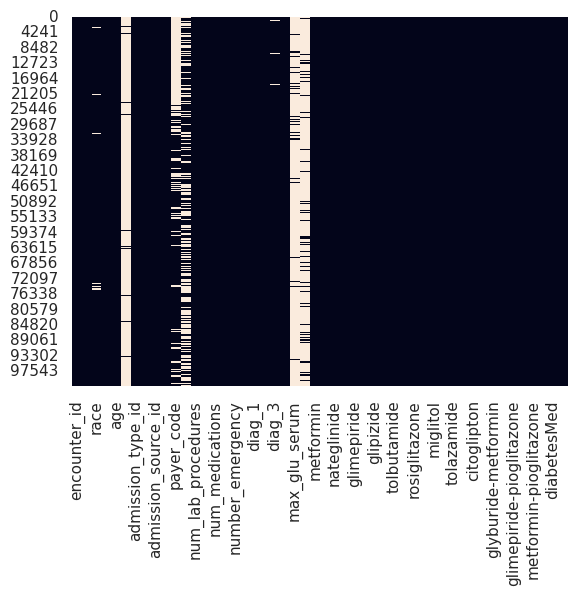

In [202]:
# I create a heatmap of missing values. Light colors represents missing values(NaN).

sns.heatmap(df.isnull(), cbar=False)
#cmap='viridis')

In [203]:
# STEP 5. Drop useless columns.
# Remove the 'weight' columns, as it unreliable for analysis. Also I remove
# "payer_code", "encounter_id", and "patient_nbr" columns, because they provided
# little analytical value.

#cols_to_drop = ['weight', 'payer_code', 'encounter_id', 'patient_nbr']

cols_to_drop = ['weight']

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Dropped columns:", [col for col in cols_to_drop if col in df.columns])
print("New shape:", df.shape)

Dropped columns: []
New shape: (101766, 49)


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object
 10  medical_specialty         51817 non-null   object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [205]:
# Clean column names (lowercase, replace spaces with underscores).

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted'],
      dtype='object')

In [207]:
# CONVERT OBJECT COLUMNS → CATEGORY

obj_cols = df.select_dtypes(include='object').columns

for col in obj_cols:
    df[col] = df[col].astype('category')

print("Converted to category:", len(obj_cols), "columns")

Converted to category: 0 columns


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      99493 non-null   category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   admission_type_id         101766 non-null  int64   
 6   discharge_disposition_id  101766 non-null  int64   
 7   admission_source_id       101766 non-null  int64   
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                61510 non-null   category
 10  medical_specialty         51817 non-null   category
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

In [209]:
# CHECK INTEGER COLUMNS

int_cols = df.select_dtypes(include='int').columns

print("\nInteger columns:\n", list(int_cols))


Integer columns:
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [210]:
# Random sample of 10 rows
print("\nPreview:\n", df.sample(10, random_state=54))


Preview:
        encounter_id  patient_nbr             race  gender      age  \
21927      76023990       308754  AfricanAmerican  Female  [30-40)   
57437     163765110     56471931  AfricanAmerican  Female  [30-40)   
64183     178602552     10023876        Caucasian  Female  [50-60)   
62023     172840152     74628099  AfricanAmerican    Male  [70-80)   
3049       19415430      1634040        Caucasian    Male  [60-70)   
35561     110096346      1869606        Caucasian    Male  [70-80)   
69825     199215624     92387772        Caucasian  Female  [70-80)   
11798      48512214     99007794        Caucasian  Female  [50-60)   
46748     144033498     24319062  AfricanAmerican    Male  [30-40)   
6824       33287862       722772        Caucasian  Female  [60-70)   

       admission_type_id  discharge_disposition_id  admission_source_id  \
21927                  1                         1                    7   
57437                  1                         1                  

In [213]:
# Check to be sure that no more "?"

(df=="?").sum().sum()

np.int64(0)

In [214]:
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
a1cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide        

In [215]:
# STEP 5.
print("Number:",df.duplicated().sum())
df=df.drop_duplicates()
print("Shape:",df.shape)

Number: 0
Shape: (101766, 49)


In [216]:
# Check missing values again
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
payer_code,40256


In [217]:
print("Count:", df['max_glu_serum'].value_counts())
print("Count:", df['a1cresult'].value_counts())

Count: max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64
Count: a1cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64


In [218]:
nan=df['a1cresult'].isna().sum()
print("Nan:", nan)

Nan: 84748


In [219]:
# Columns max_glu_serum and A1Cresult had a very high percentage of missing data:
# approximately 94.75% and 83.28%. I decided not to delete these columns, because
# they are clinically important indicators of a patient’s glucose levels.
# max_glu_serum shows the maximum glucose serum measurement.
# A1Cresult indicates long-term blood sugar control (glycated hemoglobin).

df['a1cresult']=df['a1cresult'].cat.add_categories(['None'])
df['a1cresult']=df['a1cresult'].fillna('None')

In [220]:
df['max_glu_serum']=df['max_glu_serum'].cat.add_categories(['None'])
df['max_glu_serum']=df['max_glu_serum'].fillna('None')

In [221]:
nan1=df['a1cresult'].isna().sum()
print("Nan:", nan1)
nan2=df['max_glu_serum'].isna().sum()
print("Nan:", nan2)

Nan: 0
Nan: 0


In [222]:
df['a1cresult'].value_counts()

,count
a1cresult,
None,84748
>8,8216
Norm,4990
>7,3812


In [223]:
df['max_glu_serum'].value_counts()

,count
max_glu_serum,
None,96420
Norm,2597
>200,1485
>300,1264


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      99493 non-null   category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   admission_type_id         101766 non-null  int64   
 6   discharge_disposition_id  101766 non-null  int64   
 7   admission_source_id       101766 non-null  int64   
 8   time_in_hospital          101766 non-null  int64   
 9   payer_code                61510 non-null   category
 10  medical_specialty         51817 non-null   category
 11  num_lab_procedures        101766 non-null  int64   
 12  num_procedures            101766 non-null  int64   
 13  num_medications           101

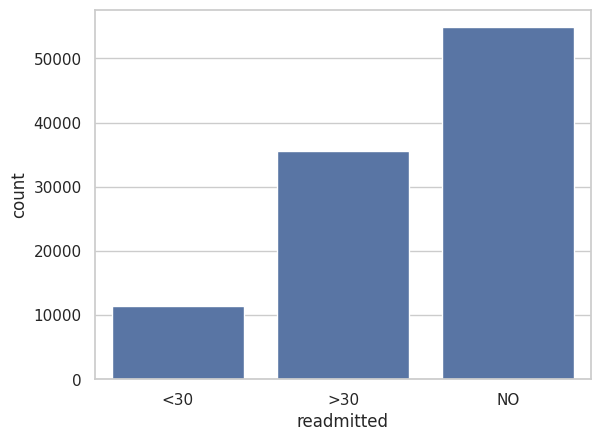

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='readmitted', data=df)
plt.show()

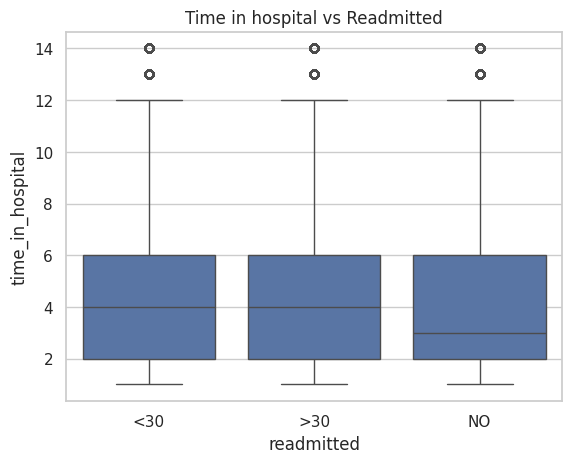

In [226]:
# Time_in_hospital vs readmitted

sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in hospital vs Readmitted')
plt.show()

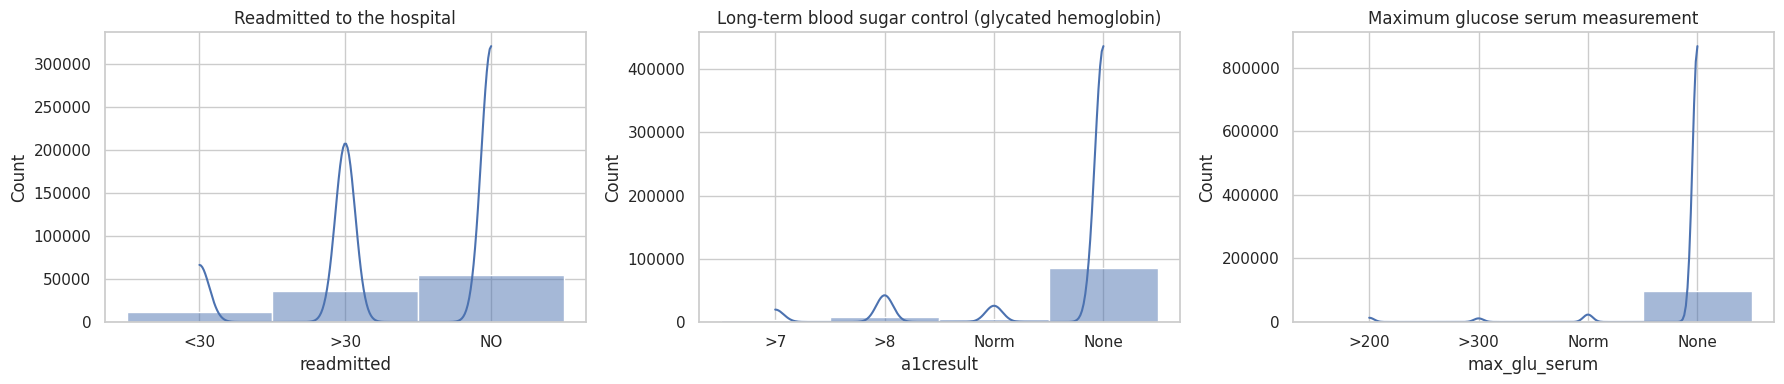

In [227]:
# STEP 10. Histogram

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df['readmitted'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Readmitted to the hospital')

sns.histplot(df['a1cresult'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Long-term blood sugar control (glycated hemoglobin)')

sns.histplot(df['max_glu_serum'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Maximum glucose serum measurement')

plt.tight_layout()
plt.show()

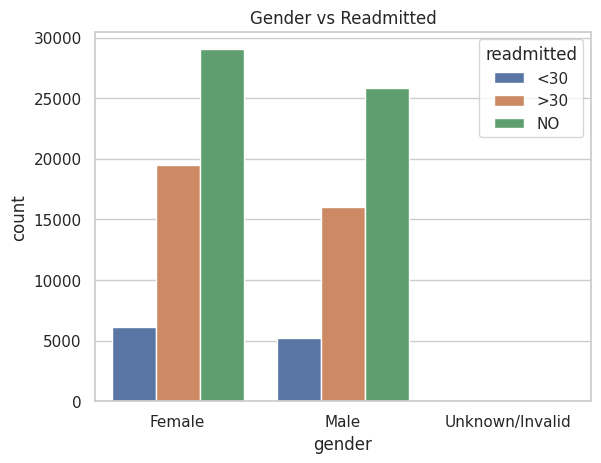

In [228]:
# Gender distribution
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Gender vs Readmitted')
plt.show()


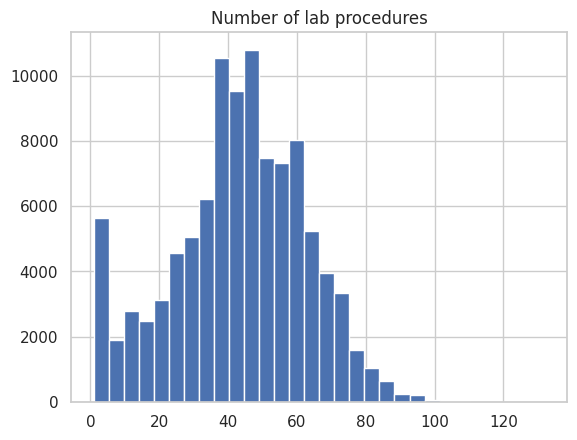

In [229]:
df['num_lab_procedures'].hist(bins=30)
plt.title('Number of lab procedures')
plt.show()

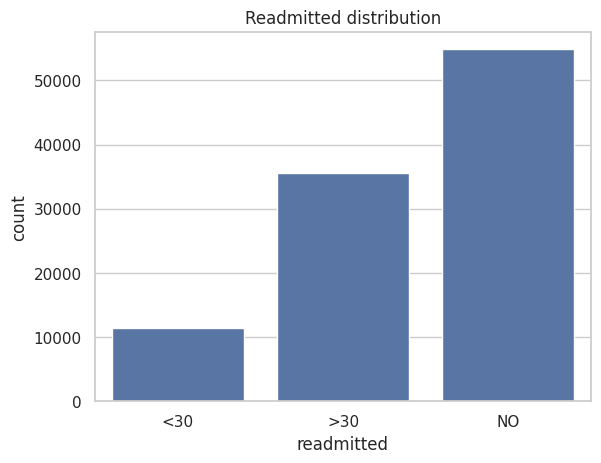

In [230]:
sns.countplot(x='readmitted', data=df)
plt.title('Readmitted distribution')
plt.show()


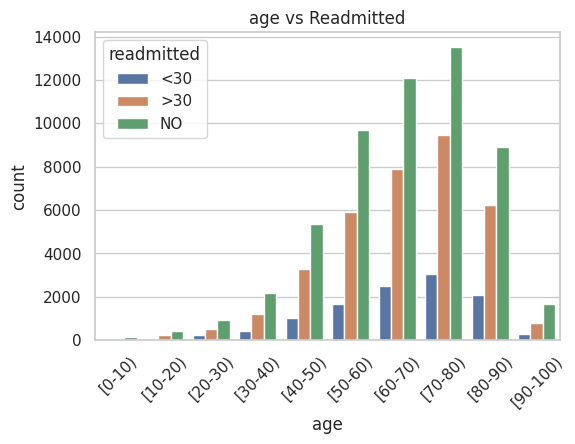

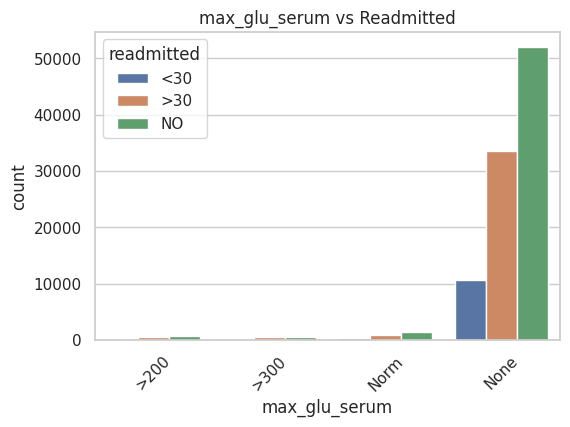

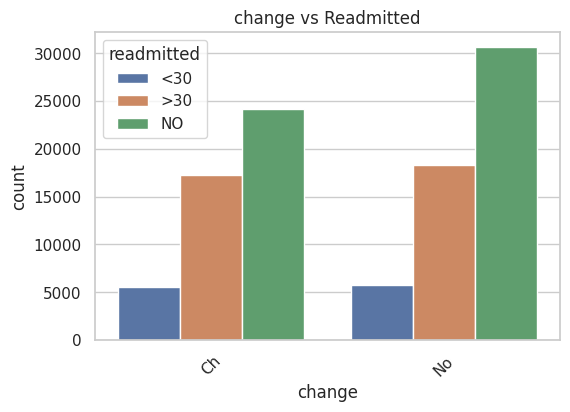

In [231]:
cat_cols = ['age','max_glu_serum','change']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='readmitted', data=df)
    plt.title(f'{col} vs Readmitted')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Target distribution - readmitted. Most patients are not readmitted within 30 days,
# but a significant portion is readmitted, indicating the need to analyze factors
# influencing readmission. Readmission is associated with longer hospital stays, more medications, more diagnoses,
# and older age. Categorical features like medication changes and high A1C also show influence.
# Patients who are readmitted tend to have higher values in time_in_hospital, num_medications,
# number_inpatient, and number_diagnoses.